In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from numpy import random
import inspect


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from sklearn.gaussian_process import kernels,GaussianProcessRegressor
import sys
import sklearn

In [14]:
def func_g(x):
    return -(np.sin(6*np.pi*x)**2) + 6*x**2 - 5*x**4 + 1.5

l = 30
vec = []
for i in range(1,31):
    xi = (i-1)/(l-1)
    vec.append(xi)
vec = np.array(vec)
finalgrid = np.meshgrid(vec, vec)

yi = func_g(vec) + np.random.normal(0,0.01,30)
n = len(yi)

train_indeces = random.choice(range(n), 20, replace=False)
test_indeces = np.setdiff1d(range(n), train_indeces)
x_train = vec[train_indeces]
y_train = yi[train_indeces]

x_test = vec[test_indeces]
test = yi[test_indeces]

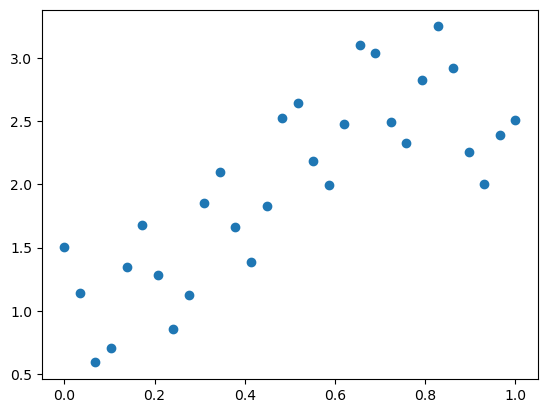

In [15]:
plt.scatter(vec, yi)

In [18]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb, sigma):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean') / sigma
    return np.exp(sq_norm)

In [8]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, params, noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    σ_noise=noise
    # Kernel of the noisy observations
    Σ11 = kernel_func(X1, X1, params) + ((σ_noise ** 2) * np.eye(n1))
    
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2, params)
    Σ21 = Σ12.T #kernel_func(X2, X1, params)
    
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12).T#, assume_a='pos').T
    
    # Compute posterior mean
    μ2 = Σ21 @ np.linalg.inv(Σ11) @ y1
    # Compute the posterior covariance
    
    Σ22 = kernel_func(X2, X2, params)
    
    Σ2 = Σ22 - (Σ21 @ np.linalg.inv(Σ11) @ Σ12)
    
    return μ2, Σ2  # mean, covariance

In [5]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, σ_noise, param):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    if type(param) == 'float':
        param = param
    # Kernel of the noisy observations
    Σ11 = kernel_func(X1, X1, param) + ((σ_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2, param)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2, param)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance

In [19]:
def func_g(x):
    return -(np.sin(6*np.pi*x)**2) + 6*x**2 - 5*x**4 + 1.5

l = 30
vec = []
for i in range(1,31):
    xi = (i-1)/(l-1)
    vec.append(xi)
vec = np.array(vec)
finalgrid = np.meshgrid(vec, vec)

yi = func_g(vec) + np.random.normal(0,0.01,30)
n = len(yi)

train_indeces = random.choice(range(n), 20, replace=False)
test_indeces = np.setdiff1d(range(n), train_indeces)
x_train = vec[train_indeces]
y_train = yi[train_indeces]

x_test = vec[test_indeces]
y_test = yi[test_indeces]

In [22]:
import scipy

# Compute the posterior mean and covariance
sigma = 0.1
σ_noise = 1.  # The standard deviation of the noise
n1 = len(x_train)
n2 = len(x_test)
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), exponentiated_quadratic, σ_noise, sigma)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2)

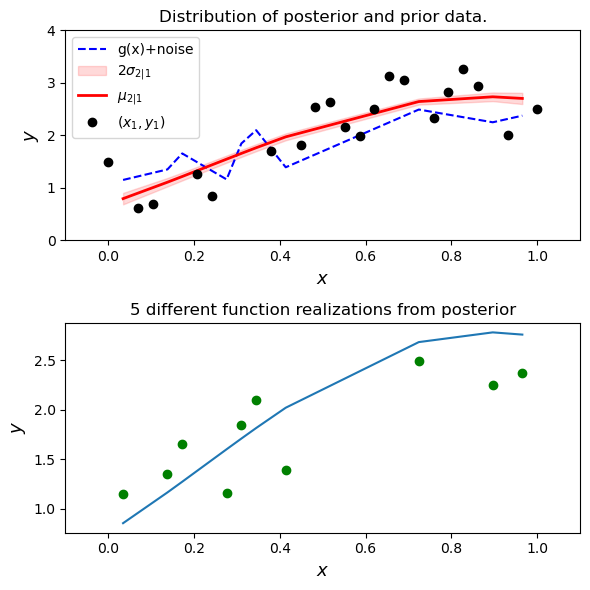

In [23]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
ax2.plot(x_test, y2.T, '-')
ax2.scatter(x_test, y_test, c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.tight_layout()
plt.show()
#

In [24]:
parameters = [2.33, 4, 1]

In [25]:
def periodic_trend_kernel(xa, xb, params):
    B, L21, L22, p = params[0], params[1], params[2], params[3]
    sqnorm = scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return B*np.exp(-sqnorm / (2 * (L21 ** 2)) - (2 / L22 ** 2) * (np.sin(np.pi * sqnorm / p)) ** 2)

def periodic(xa, xb, params):
    sigma2, l, p = params[0], params[1], params[2]
    mat = np.zeros((len(xa), len(xb)))
    for i in range(len(xa)):
        for j in range(len(xb)):
            abs = np.abs(xa[i] - xb[j])
            mat[i,j] = abs
    return sigma2 * np.exp(-2/l**2 * (np.sin(np.pi * mat/p)**2))
    #return mat

In [26]:
# Compute the posterior mean and covariance
parameters = [2.33, 4, 1]
#σ_noise = 1.  # The standard deviation of the noise
n1 = len(x_train)
n2 = len(x_test)
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train, y_train, x_test, periodic, parameters, 1)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2)

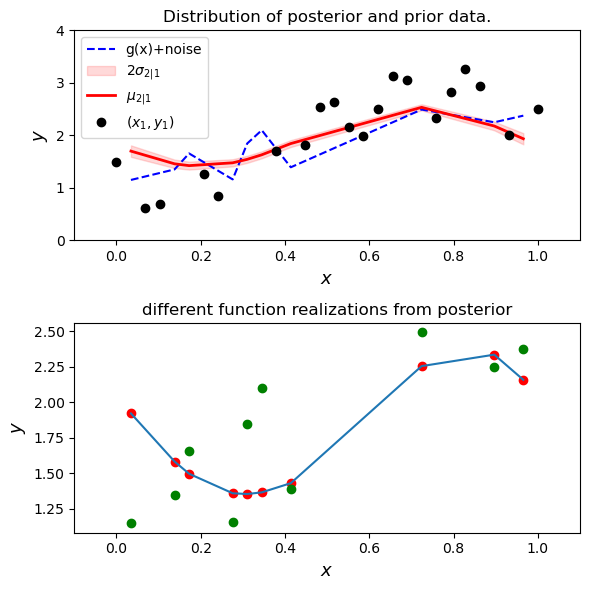

In [27]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
ax2.plot(x_test, y2.T, '-')
ax2.scatter(x_test, y2, c="red")
ax2.scatter(x_test, y_test, c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.tight_layout()
plt.show()
#

In [28]:
# use function definitions and fill in the blanks
# B) todo: implement this
def negLogLikelihood(params, kernel, S=x_train, y=y_train):
    noise_y = params[0]    
    eta = params[1:]
    sigma_y_I = noise_y*np.eye(y.shape[0])
    K = kernel(S[:, np.newaxis], S[:, np.newaxis], params = eta)
    n = y.shape[0]
     
    observed_fit = y.T@scipy.linalg.inv(sigma_y_I+K)@y
    model_complexity = np.log(np.linalg.det(sigma_y_I+K))
    print(f"data fit={np.round(observed_fit,2)}")
    print(f"model complexity={np.round(model_complexity,2)}")
    
    ll = -1/2*observed_fit - 1/2*model_complexity #- n/2*np.log(np.sqrt(2*np.pi)) # NOTE: we can drop the constant here
    # small HACK to avoid -inf of problematic regions
    if np.isinf(ll):
        return np.inf # NOTE: we optimize by minimization, hence large positive value should be discarded by opt routine
    return -ll # NEGATIVE loglikelihood


def optimize_params(ranges, kernel, Ngrid):
    opt_params = scipy.optimize.brute(lambda params: negLogLikelihood(params, kernel), ranges, Ns=Ngrid, finish=None)
    noise_var = opt_params[0]
    eta = opt_params[1:]
    nll = negLogLikelihood(opt_params, kernel) # NOTE: added
    print(f"optimized NLL={nll}")
    return noise_var, eta

In [29]:
#sigma2, l, p 

kernel = periodic
ranges = ((1.e-4,1e-1), (1.e-4,6), (1.e-4,6), (1.e-4, 1))
Ngrid = 7
noise_var, eta = optimize_params(ranges, kernel, Ngrid)
print("optimal params:", noise_var, eta)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\2376988120.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


data fit=499363.36
model complexity=-170.63
data fit=510158.62
model complexity=-170.34
data fit=510158.62
model complexity=-170.34
data fit=510158.62
model complexity=-170.34
data fit=510158.62
model complexity=-170.34
data fit=510158.62
model complexity=-170.34
data fit=499363.36
model complexity=-170.63
data fit=210538.12
model complexity=-176.98
data fit=165751.87
model complexity=-176.94
data fit=181990.7
model complexity=-176.91
data fit=198284.66
model complexity=-176.93
data fit=204159.45
model complexity=-176.97
data fit=165227.83
model complexity=-177.06
data fit=126653.9
model complexity=-176.99
data fit=177841.14
model complexity=-179.02
data fit=142719.23
model complexity=-178.98
data fit=170983.29
model complexity=-178.98
data fit=172505.38
model complexity=-179.0
data fit=175073.95
model complexity=-179.03
data fit=144180.94
model complexity=-179.06
data fit=114683.65
model complexity=-179.03
data fit=172023.92
model complexity=-179.86
data fit=145628.74
model complexity

In [30]:
opt_par = eta

n1 = len(x_train)
n2 = len(x_test)
ny = 1 #n° of functions
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train, y_train, x_test, periodic, opt_par, noise_var)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2_periodic = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

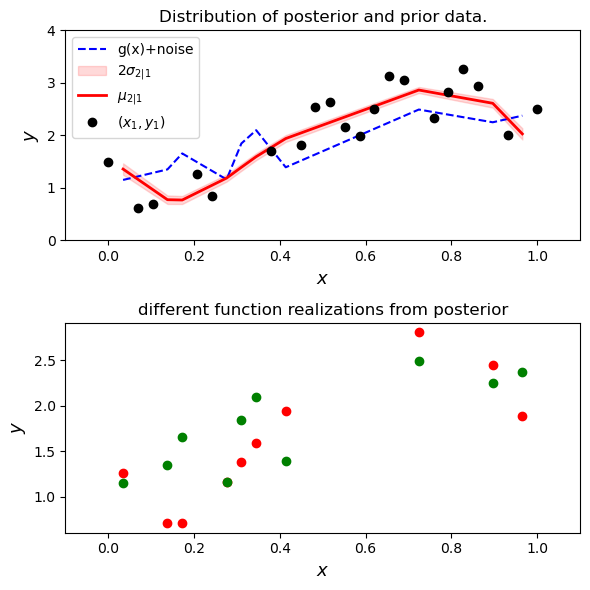

In [31]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
#ax2.plot(x_test, y2.T, '-')
ax2.scatter(x_test, y2_periodic, c="red")
ax2.scatter(x_test, y_test, c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.tight_layout()
plt.show()
#

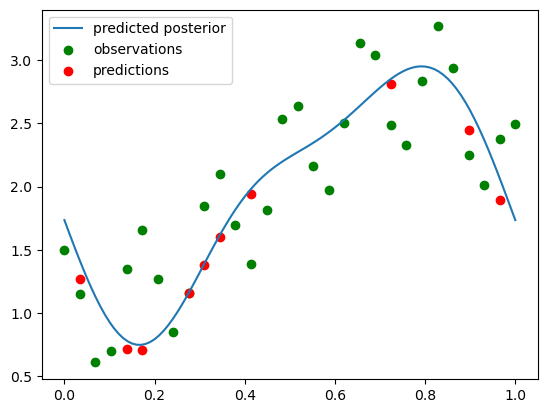

In [32]:
x = np.linspace(0, 1, 101)
μ2, Σ2 = GP_noise(x_train, y_train, x, periodic, opt_par, noise_var)
y4 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)


b = plt.plot(x, y4.T, label="predicted posterior")
plt.scatter(vec,yi, c="green", label="observations")
plt.scatter(x_test,y2_periodic, c="red", label="predictions")
plt.legend()

In [33]:
def local_periodic(xa, xb, params):
    sigma2, lp, p, leq = params[0], params[1], params[2], params[3]
    mat = np.zeros((len(xa), len(xb)))
    norm = scipy.spatial.distance.cdist(xa.reshape(-1,1), xb.reshape(-1,1), 'sqeuclidean')
    for i in range(len(xa)):
        for j in range(len(xb)):
            abs = np.abs(xa[i] - xb[j])
            mat[i,j] = abs
    return sigma2 * np.exp(-2/lp**2 * (np.sin(np.pi * mat/p)**2)) * np.exp(-norm/(2*leq**2))
    #return mat

In [34]:
kernel = local_periodic
ranges = ((1.e-4,1.e-1), (1.e-4,10), (0.1, 0.4), (1.e-4,1), (1.e-4,10))
Ngrid = 5
noise_var, eta = optimize_params(ranges, kernel, Ngrid)
print("optimal params:", noise_var, eta)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\3285495555.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


data fit=510158.62
model complexity=-170.34
data fit=473220.06
model complexity=-170.61
data fit=472907.24
model complexity=-170.65
data fit=472853.78
model complexity=-170.65
data fit=472835.44
model complexity=-170.66
data fit=510158.62
model complexity=-170.34
data fit=474162.7
model complexity=-170.61
data fit=473808.53
model complexity=-170.65
data fit=473747.36
model complexity=-170.66
data fit=473726.32
model complexity=-170.66
data fit=510158.62
model complexity=-170.34
data fit=484863.96
model complexity=-170.61
data fit=484518.64
model complexity=-170.64
data fit=484458.95
model complexity=-170.65
data fit=484438.42
model complexity=-170.65
data fit=510158.62
model complexity=-170.34
data fit=491511.39
model complexity=-170.93
data fit=492053.3
model complexity=-170.98
data fit=492165.62
model complexity=-170.99
data fit=492205.87
model complexity=-170.99
data fit=510158.62
model complexity=-170.34
data fit=468230.26
model complexity=-170.61
data fit=467965.54
model complexit

In [35]:
opt_par = eta

n1 = len(x_train)
n2 = len(x_test)
ny = 1 #n° of functions
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train, y_train, x_test, local_periodic, opt_par, noise_var)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2_loc_per = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

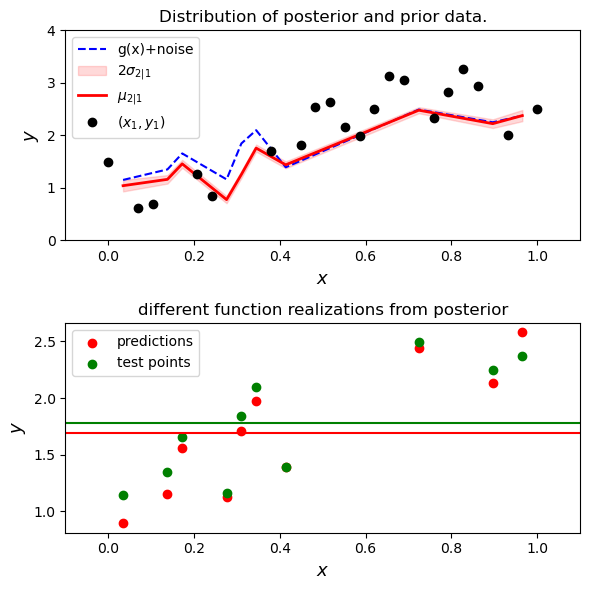

In [36]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
#ax2.plot(x_test, y2.T, '-')
#ax2.plot(x_test, y2, c="red")
ax2.scatter(x_test, y2_loc_per, c="red", label = "predictions")
ax2.axhline(np.mean(y2_loc_per), c="red")
ax2.scatter(x_test, y_test, c="green", label = "test points")
ax2.axhline(np.mean(y_test), c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.legend()
plt.tight_layout()
plt.show()
#

In [37]:
x = np.linspace(0, 1, 101)
μ2, Σ2 = GP_noise(x_train, y_train, x, local_periodic, opt_par, noise_var)
y3 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

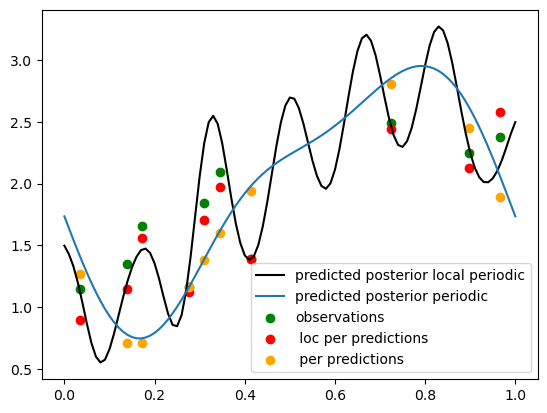

In [38]:
plt.plot(x, y3.T, label="predicted posterior local periodic", c="black")
plt.plot(x, y4.T, label="predicted posterior periodic")
plt.scatter(x_test,y_test, c="green", label="observations")
plt.scatter(x_test,y2_loc_per, c="red", label=" loc per predictions")
plt.scatter(x_test,y2_periodic, c="orange", label=" per predictions")
plt.legend()

In [40]:
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb, params):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean') / params
    return np.exp(sq_norm)

In [41]:
kernel = exponentiated_quadratic
ranges = ((1.e-4,1.e-1), (1.e-4,10))
Ngrid = 10
noise_var, eta = optimize_params(ranges, kernel, Ngrid)
print("optimal params:", noise_var, eta)

data fit=101.65
model complexity=0.0
data fit=24392.34
model complexity=-154.01
data fit=29638.16
model complexity=-157.56
data fit=33769.63
model complexity=-159.2
data fit=35851.06
model complexity=-160.18
data fit=36907.63
model complexity=-160.88
data fit=37527.36
model complexity=-161.43
data fit=37953.69
model complexity=-161.88
data fit=38288.79
model complexity=-162.26
data fit=38578.24
model complexity=-162.58
data fit=100.54
model complexity=0.22
data fit=328.36
model complexity=-75.94
data fit=364.65
model complexity=-77.48
data fit=386.48
model complexity=-78.2
data fit=401.81
model complexity=-78.62
data fit=413.37
model complexity=-78.91
data fit=422.71
model complexity=-79.12
data fit=430.67
model complexity=-79.3
data fit=437.73
model complexity=-79.44
data fit=444.17
model complexity=-79.56
data fit=99.45
model complexity=0.44
data fit=173.87
model complexity=-64.09
data fit=194.73
model complexity=-65.38
data fit=207.54
model complexity=-65.96
data fit=216.72
model co

In [42]:
opt_par = eta

n1 = len(x_train)
n2 = len(x_test)
ny = 1 #n° of functions
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), exponentiated_quadratic, opt_par, noise_var)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2_rbf = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

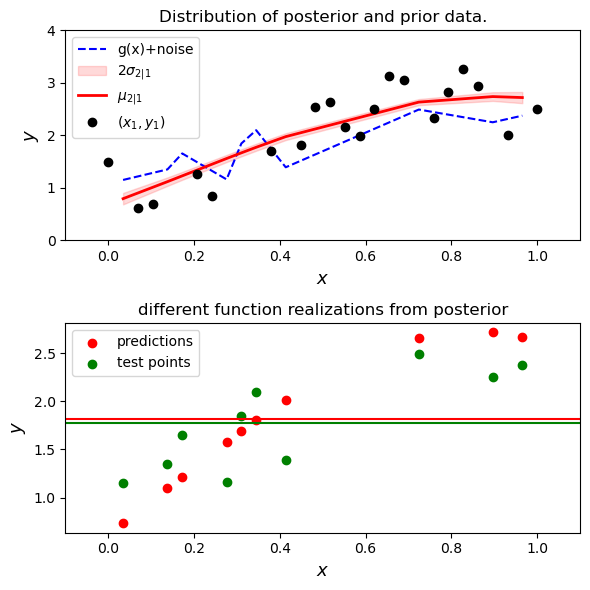

In [43]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
#ax2.plot(x_test, y2.T, '-')
#ax2.plot(x_test, y2, c="red")
ax2.scatter(x_test, y2_rbf, c="red", label = "predictions")
ax2.axhline(np.mean(y2_rbf), c="red")
ax2.scatter(x_test, y_test, c="green", label = "test points")
ax2.axhline(np.mean(y_test), c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.legend()
plt.tight_layout()
plt.show()
#

In [44]:
x = np.linspace(0, 1, 101)
μ2, Σ2 = GP_noise(x_train.reshape(-1,1), y_train, x.reshape(-1,1), exponentiated_quadratic, opt_par, noise_var)
y5 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

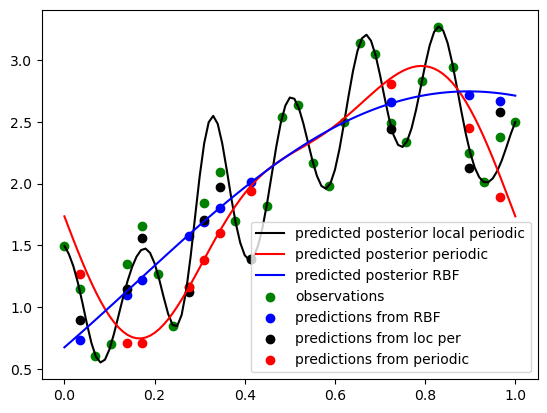

In [45]:
plt.plot(x, y3.T, label="predicted posterior local periodic", c="black")
plt.plot(x, y4.T, label="predicted posterior periodic", c="red")
plt.plot(x, y5.T, label="predicted posterior RBF", c="blue")
plt.scatter(vec,yi, c="green", label="observations")
plt.scatter(x_test,y2_rbf, c="blue", label="predictions from RBF")
plt.scatter(x_test,y2_loc_per, c="black", label="predictions from loc per")
plt.scatter(x_test,y2_periodic, c="red", label="predictions from periodic")
plt.legend()

In [46]:
# ASSUME LOG-NORMALITY FOR THE FOUR PARAMETERS OF THE LOCAL PERIODIC: sigma2, lp, p, leq

np.random.seed(0)

# params of the Normal distribution

mus = np.array([0,0,0,0])
covmatr  = np.array([[.5, 0, 0, 0],[0, .3, 0, 0],[0, 0, .5, 0], [0, 0, 0, .2]])

norm_par = random.multivariate_normal(mus, covmatr, size=1)

# params of the lognormals:
m_ampl, v_ampl = np.exp(mus[0]+0.5*covmatr[0,0]), np.exp(2*mus[0]+covmatr[0][0])*(np.exp(covmatr[0][0])-1)
m_lp, v_lp = np.exp(mus[1]+0.5*covmatr[1][1]), np.exp(2*mus[1]+covmatr[1][1])*(np.exp(covmatr[1][1])-1)
m_per, v_per = np.exp(mus[2]+0.5*covmatr[2][2]), np.exp(2*mus[2]+covmatr[2][2])*(np.exp(covmatr[2][2])-1)
m_leq, v_leq = np.exp(mus[3]+0.5*covmatr[3][3]), np.exp(2*mus[3]+covmatr[3][3])*(np.exp(covmatr[3][3])-1)

# Log-normally distributed sample:

parameters = np.exp(norm_par)
lognorm_mu = np.array([m_ampl, m_lp, m_per, m_leq])
lognorm_cov = np.matrix([[v_ampl, 0, 0, 0],[0, v_lp, 0, 0],[0, 0, v_per, 0], [0, 0, 0, v_leq]])
print(lognorm_mu)
print(lognorm_cov)

[1.28402542 1.16183424 1.28402542 1.10517092]
[[1.06956056 0.         0.         0.        ]
 [0.         0.47225999 0.         0.        ]
 [0.         0.         1.06956056 0.        ]
 [0.         0.         0.         0.27042194]]


In [47]:
# Prior and log-prior for the function to maximize

# Prior

diff = np.log(parameters)-lognorm_mu
prior = np.array((2*np.pi)**(-1.5) * (np.linalg.det(lognorm_cov))**(-0.5) * np.prod(1/parameters) * np.exp(-0.5 * diff @ np.linalg.inv(lognorm_cov) @ diff.T))
print(np.log(prior))

# logprior

def logprior(p, m, s):
    diff = np.log(p) - m
    return(np.array(-1.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(s)) - np.sum(np.log(p)) - 0.5 * diff @ np.linalg.inv(s) @ diff.T))
logprior(parameters, lognorm_mu, lognorm_cov)

[[-5.76693228]]


array([[-5.76693228]])

In [70]:
def f_to_minimize(params, kernel, S=x_train, y=y_train, means = lognorm_mu, vars = lognorm_cov):
    noise_y = params[0]    
    eta = params[1:]
    sigma_y_I = noise_y*np.eye(y.shape[0])
    K = kernel(S[:, np.newaxis], S[:, np.newaxis], params = eta)
    n = y.shape[0]
    
    second_term = logprior(eta, means, vars)
    
    # using lecture notes 6.2
    observed_fit = y.T@scipy.linalg.inv(sigma_y_I+K)@y
    model_complexity = np.log(np.linalg.det(sigma_y_I+K))
    evidence = -1/2*observed_fit - 1/2*model_complexity 
    if np.isinf(evidence):
        return np.inf # NOTE: we optimize by minimization, hence large positive value should be discarded by opt routine
    return - evidence - second_term # NEGATIVE loglikelihood

def optimize_params_second(ranges, kernel, Ngrid):
    opt_params = scipy.optimize.brute(lambda params: f_to_minimize(params, kernel), ranges, Ns=Ngrid, finish=None)
    noise_var = opt_params[0]
    eta = opt_params[1:]
    nll = f_to_minimize(opt_params, kernel) # NOTE: added
    print(f"optimized NLL={nll}")
    return noise_var, eta

In [71]:
kernel = local_periodic
ranges = ((1.e-4,1.e-1), (1.e-4,6), (0.1, 4), (1.e-4,2), (0.1,4))
Ngrid = 5
noise_var, eta = optimize_params_second(ranges, kernel, Ngrid)
print("optimal params:", noise_var, eta)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\3285495555.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


optimized NLL=[[-2.97698526]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]


In [72]:
opt_par = eta

n1 = len(x_train)
n2 = len(x_test)
ny = 1 #n° of functions
domain = (-0.1, 1.1)
# Compute posterior mean and covariance
μ2, Σ2 = GP_noise(x_train.reshape(-1,1), y_train, x_test.reshape(-1,1), local_periodic, opt_par, noise_var)
# Compute the standard deviation at the test points to be plotted
#σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y_locpost_wpriors = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\3285495555.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


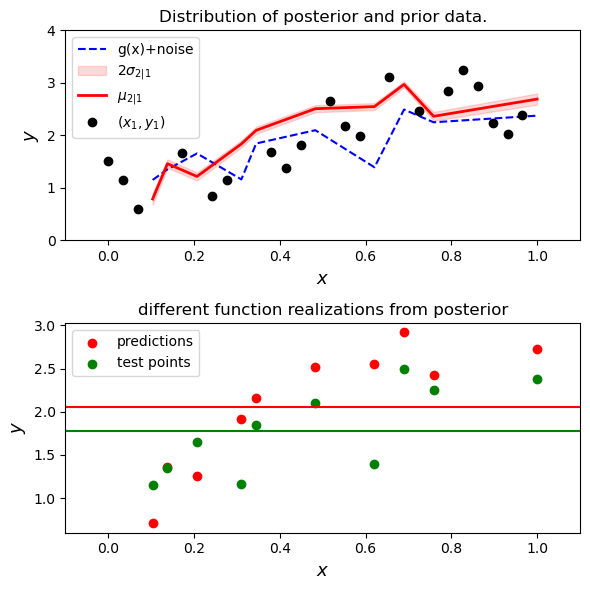

In [73]:
# Plot the postior distribution and some samples
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(x_test, y_test, 'b--', label='g(x)+noise')
ax1.fill_between(x_test.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2 \sigma_{2|1}$')
ax1.plot(x_test, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(x_train, y_train, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 4])
ax1.legend()
# Plot some samples from this function
#ax2.plot(x_test, y2.T, '-')
#ax2.plot(x_test, y2, c="red")
ax2.scatter(x_test, y_locpost_wpriors, c="red", label = "predictions")
ax2.axhline(np.mean(y_locpost_wpriors), c="red")
ax2.scatter(x_test, y_test, c="green", label = "test points")
ax2.axhline(np.mean(y_test), c="green")
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('different function realizations from posterior')
ax1.axis([domain[0], domain[1], 0, 4])
ax2.set_xlim([-.1, 1.1])
plt.legend()
plt.tight_layout()
plt.show()


In [74]:
x = np.linspace(0, 1, 101)
μ2, Σ2 = GP_noise(x_train.reshape(-1,1), y_train, x.reshape(-1,1), local_periodic, opt_par, noise_var)
Y_pred_local_periodic_wpriors = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\3285495555.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


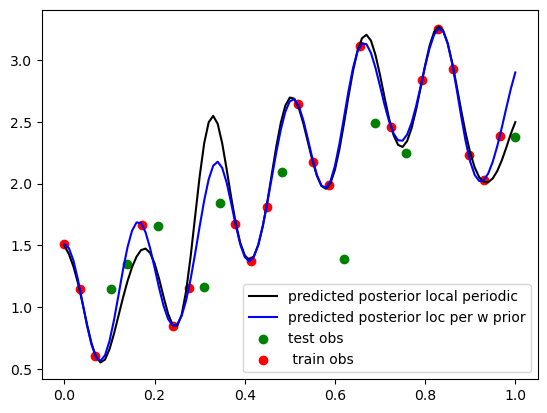

In [75]:
plt.plot(x, y3.T, label="predicted posterior local periodic", c="black")
#plt.plot(x, y4.T, label="predicted posterior periodic")
plt.plot(x, Y_pred_local_periodic_wpriors.T, label="predicted posterior loc per w prior", c="blue")
plt.scatter(x_test,y_test, c="green", label="test obs")
plt.scatter(x_train,y_train, c="red", label=" train obs")
#plt.scatter(x_test,y2_loc_per, c="red", label=" loc per predictions")
#plt.scatter(x_test,y2_periodic, c="orange", label=" per predictions")
#plt.scatter(x_test,y_locpost_wpriors, c="blue", label=" loc per w prior")
plt.legend()

In [173]:
# opt par for the local trend with prior

opt_par

array([3.00005 , 1.075   , 0.500075, 1.075   ])

In [77]:
xtrains = []
xtests = []
ytrains = []
ytests = []


l = 30
vec = []
for i in range(1,31):
    xi = (i-1)/(l-1)
    vec.append(xi)
vec = np.array(vec)
finalgrid = np.meshgrid(vec, vec)

for k in range(21):
    np.random.seed(k)
    yi = func_g(vec) + np.random.normal(0,0.01,30)
    n = len(yi)
    
    train_indeces = random.choice(range(n), 20, replace=False)
    test_indeces = np.setdiff1d(range(n), train_indeces)
    x_train = vec[train_indeces]
    y_train = yi[train_indeces]
    
    x_test = vec[test_indeces]
    test = yi[test_indeces]

    xtrains.append(x_train)
    ytrains.append(y_train)
    xtests.append(x_test)
    ytests.append(y_test)

In [85]:
ypreds = []
testlikelihoods = []

for k in range(21):

    def f_to_minimize(params, kernel, S=xtrains[k], y=ytrains[k], means = lognorm_mu, vars = lognorm_cov):
        noise_y = params[0]    
        eta = params[1:]
        sigma_y_I = noise_y*np.eye(y.shape[0])
        K = kernel(S[:, np.newaxis], S[:, np.newaxis], params = eta)
        n = y.shape[0]
        
        second_term = logprior(eta, means, vars)
        
        # using lecture notes 6.2
        observed_fit = y.T@scipy.linalg.inv(sigma_y_I+K)@y
        model_complexity = np.log(np.linalg.det(sigma_y_I+K))
        evidence = -1/2*observed_fit - 1/2*model_complexity 
        if np.isinf(evidence):
            return np.inf # NOTE: we optimize by minimization, hence large positive value should be discarded by opt routine
        return - evidence - second_term # NEGATIVE loglikelihood
    
    def optimize_params_second(ranges, kernel, Ngrid):
        opt_params = scipy.optimize.brute(lambda params: f_to_minimize(params, kernel), ranges, Ns=Ngrid, finish=None)
        noise_var = opt_params[0]
        eta = opt_params[1:]
        nll = f_to_minimize(opt_params, kernel) # NOTE: added
        print(f"optimized NLL={nll}")
        return noise_var, eta, nll

    kernel = local_periodic
    ranges = ((1.e-4,1.e-1), (1.e-4,6), (0.1, 4), (1.e-4,2), (0.1,4))
    Ngrid = 5
    noise_var, eta, testlik = optimize_params_second(ranges, kernel, Ngrid)
    testlikelihoods.append(testlik)
    print("optimal params:", noise_var, eta)

    opt_par = eta
    domain = (-0.1, 1.1)
    # Compute posterior mean and covariance
    μ2, Σ2 = GP_noise(xtrains[k].reshape(-1,1), ytrains[k], xtests[k].reshape(-1,1), local_periodic, opt_par, noise_var)
    
    # Draw some samples of the posterior
    y_locpost_wpriors = np.random.multivariate_normal(mean=μ2, cov=Σ2)

    x = np.linspace(0, 1, 101)
    μ2, Σ2 = GP_noise(xtrains[k].reshape(-1,1), ytrains[k], x.reshape(-1,1), local_periodic, opt_par, noise_var)
    Y_pred_local_periodic_wpriors = np.random.multivariate_normal(mean=μ2, cov=Σ2)

    ypreds.append(Y_pred_local_periodic_wpriors)
    

C:\Users\Utente\AppData\Local\Temp\ipykernel_22820\3285495555.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mat[i,j] = abs


optimized NLL=[[-2.04971461]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-1.98199672]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-0.84954407]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[0.10082013]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-3.91201444]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-2.33597297]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-0.48426438]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-7.28133402]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-5.07881457]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-6.90482549]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]
optimized NLL=[[-4.75752209]]
optimal params: 0.0001 [3.00005  1.075    0.500075 1.075   ]


IndexError: list assignment index out of range

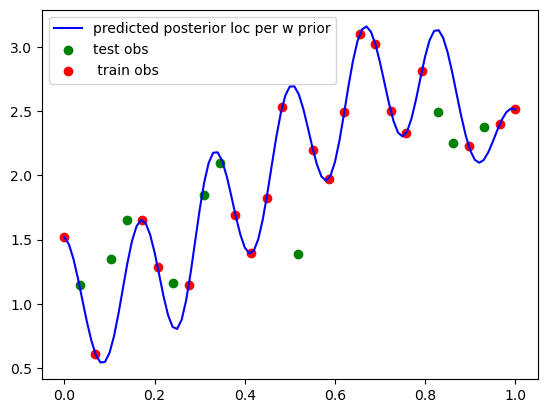

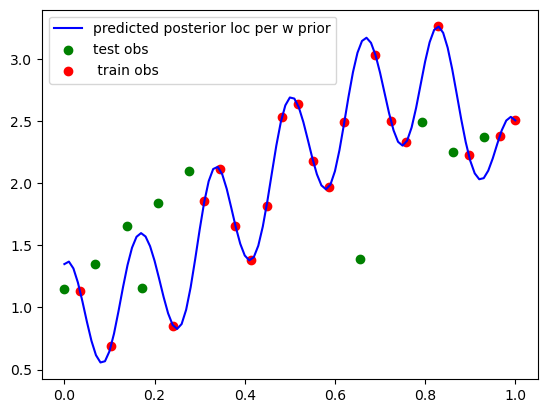

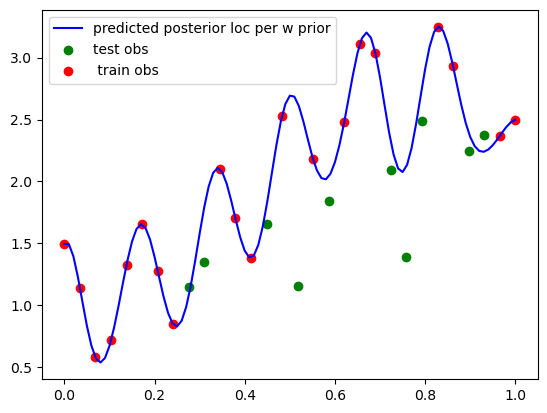

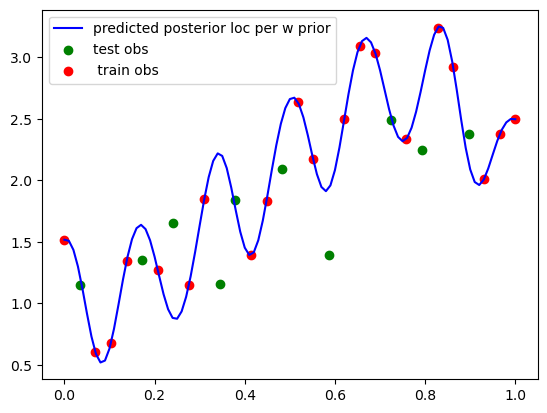

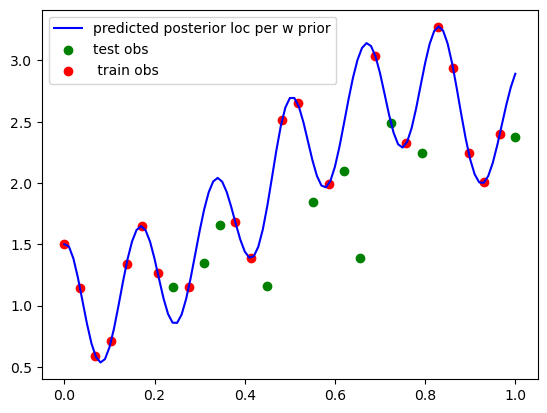

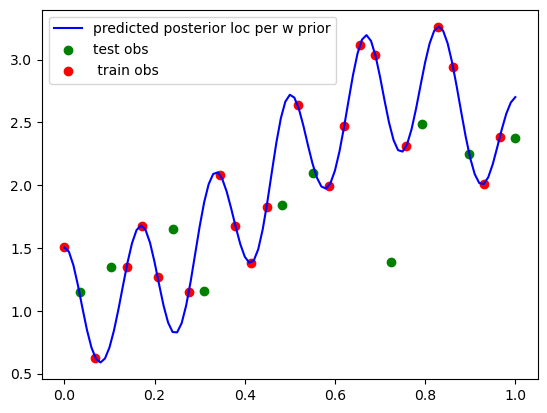

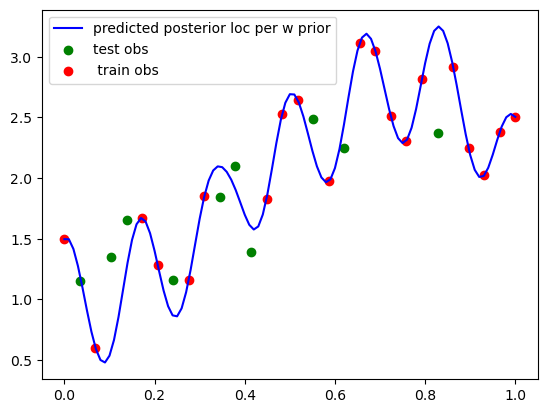

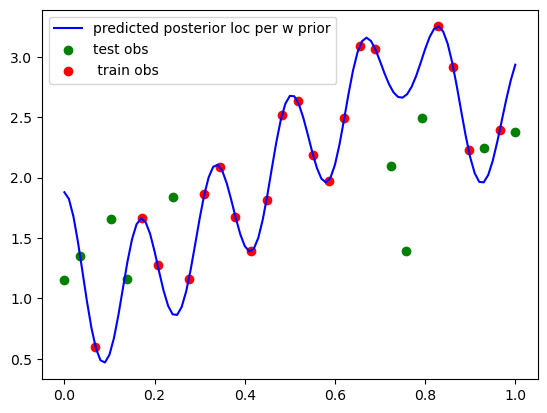

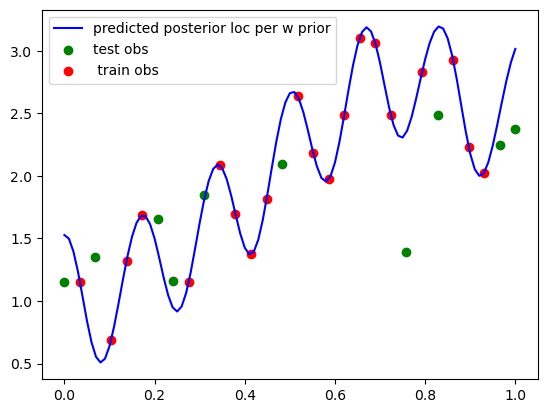

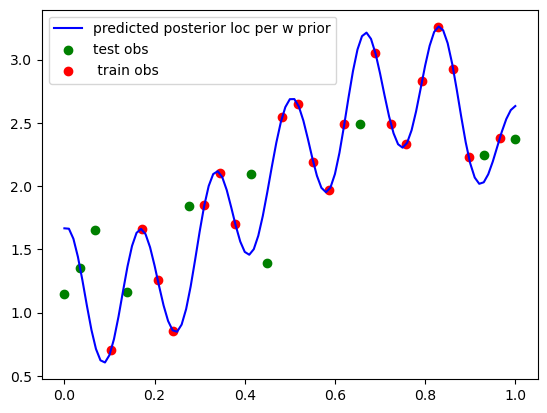

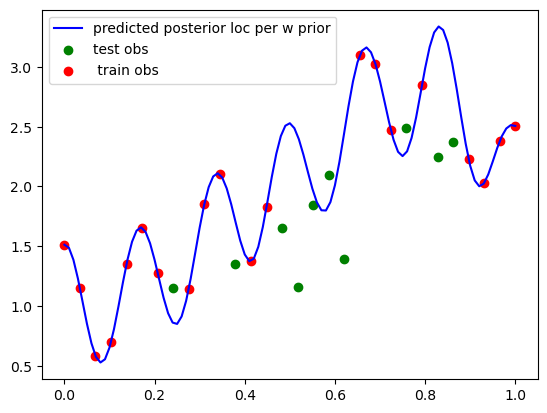

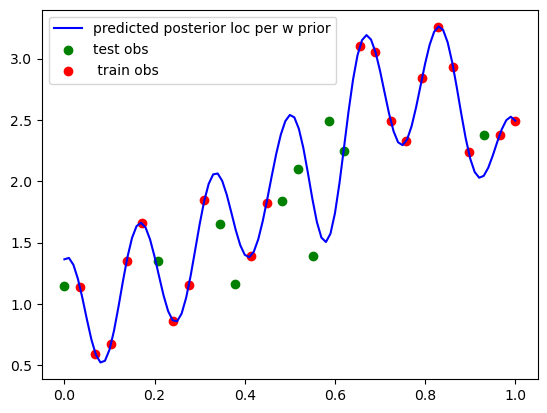

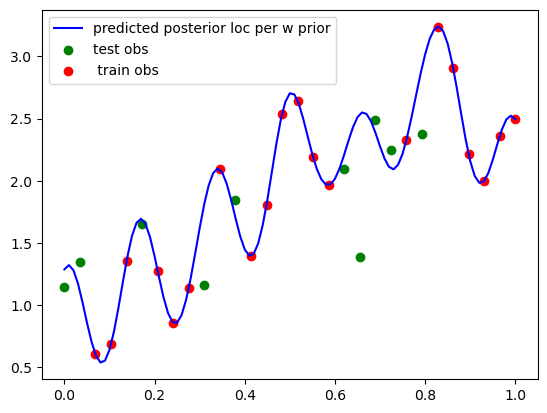

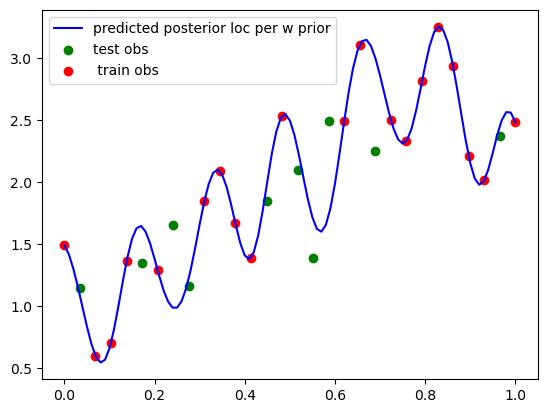

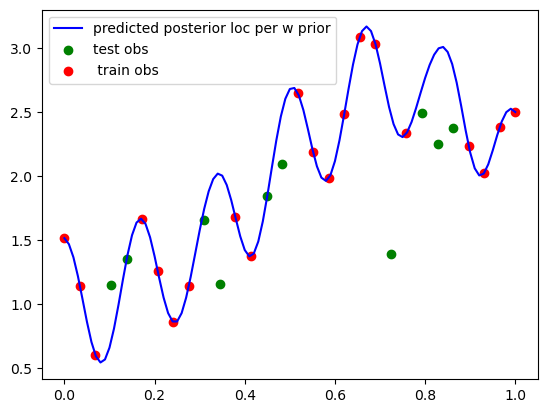

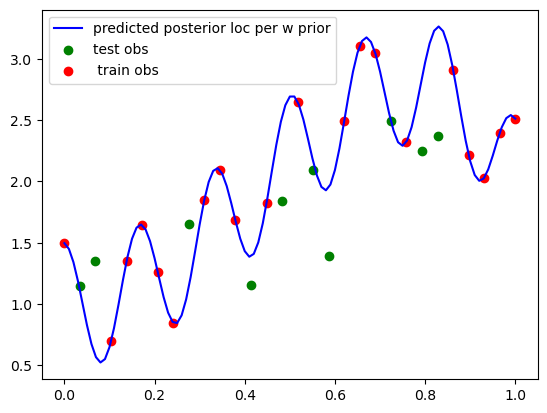

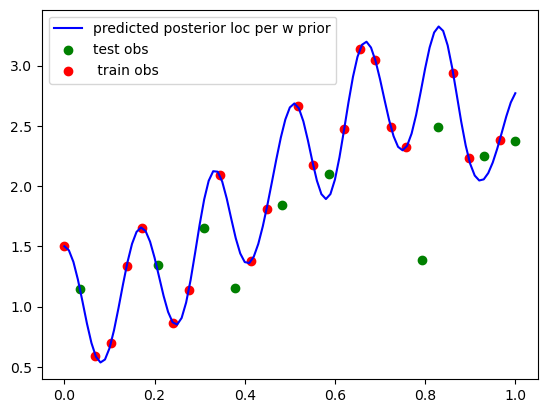

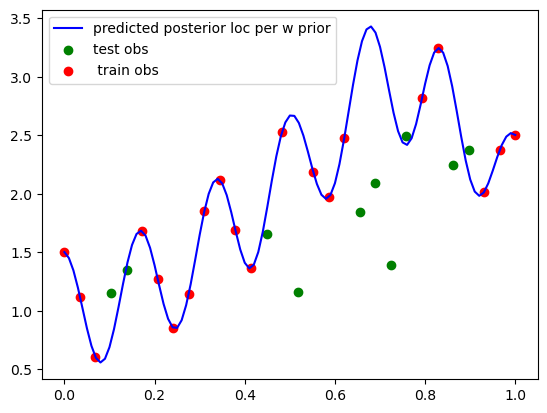

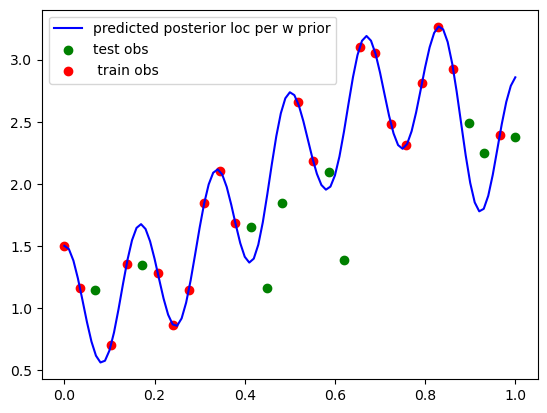

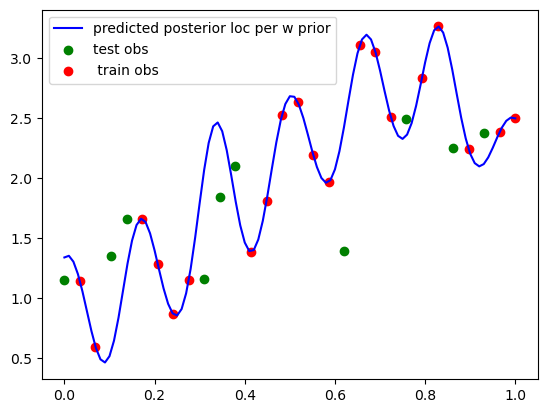

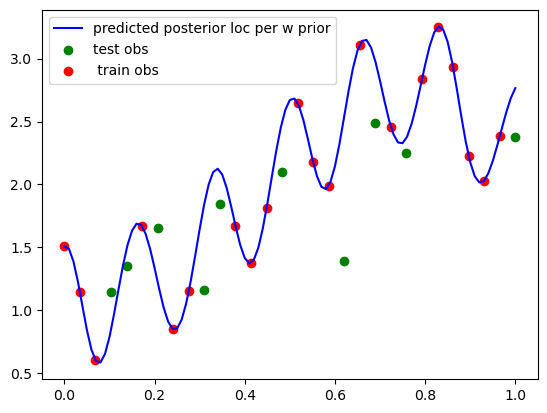

In [84]:
for k in range(21):
    x = np.linspace(0, 1, 101)
    plt.plot(x, ypreds[k].T, label="predicted posterior loc per w prior", c="blue")
    plt.scatter(xtests[k],ytests[k], c="green", label="test obs")
    plt.scatter(xtrains[k], ytrains[k], c="red", label=" train obs")
    plt.legend()
    plt.show()

In [87]:
testlikelihoods

[array([[-2.04971461]]),
 array([[-1.98199672]]),
 array([[-0.84954407]]),
 array([[0.10082013]]),
 array([[-3.91201444]]),
 array([[-2.33597297]]),
 array([[-0.48426438]]),
 array([[-7.28133402]]),
 array([[-5.07881457]]),
 array([[-6.90482549]]),
 array([[-4.75752209]]),
 array([[-6.61780916]]),
 array([[-4.32764054]]),
 array([[-3.39979146]]),
 array([[-2.20040783]]),
 array([[-1.34620073]]),
 array([[-2.86786169]]),
 array([[-2.44330463]]),
 array([[-5.91525804]]),
 array([[-1.83744134]])]